<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Dog_vs_Cats_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning**

Transfer learning is a Deep Learning technique where we use a pre-trained model. This pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset.

Transfer Learning gives higher accuracy compared to training models from scratch.

Examples: of Pre - Trained Models:
1. VGG-16
2. ResNet50
3. Inceptionv3
4. MobileNet V2

Work Flow:
1. Dataset
2. Image Processing
3. Train Test Split
4. Pretrained MobileNet Model

Extrating Dataset using Keggle API

In [1]:
# installin the Kaggle library
!pip install kaggle

In [2]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Import the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:08<00:00, 94.2MB/s]
100% 812M/812M [00:08<00:00, 98.0MB/s]


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


Printing the name of the Images

In [7]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.1163.jpg', 'dog.878.jpg', 'dog.4006.jpg', 'cat.498.jpg', 'dog.964.jpg', 'dog.8529.jpg', 'cat.6345.jpg', 'dog.5328.jpg', 'dog.4963.jpg', 'dog.11549.jpg', 'dog.2041.jpg', 'cat.7468.jpg', 'dog.5626.jpg', 'dog.8514.jpg', 'cat.2860.jpg', 'cat.4655.jpg', 'dog.11268.jpg', 'cat.6335.jpg', 'cat.10252.jpg', 'cat.1630.jpg', 'dog.8747.jpg', 'dog.7009.jpg', 'cat.7889.jpg', 'dog.8944.jpg', 'cat.8475.jpg', 'dog.5908.jpg', 'dog.9218.jpg', 'cat.7643.jpg', 'cat.12039.jpg', 'cat.8011.jpg', 'cat.4164.jpg', 'cat.7925.jpg', 'cat.9641.jpg', 'dog.2922.jpg', 'cat.9325.jpg', 'cat.1868.jpg', 'cat.11541.jpg', 'cat.4779.jpg', 'dog.6609.jpg', 'cat.8325.jpg', 'cat.3646.jpg', 'dog.2809.jpg', 'dog.10114.jpg', 'dog.5445.jpg', 'dog.1250.jpg', 'dog.3683.jpg', 'cat.9138.jpg', 'cat.4000.jpg', 'cat.4216.jpg', 'cat.1859.jpg', 'dog.10167.jpg', 'dog.7767.jpg', 'dog.6494.jpg', 'dog.6581.jpg', 'cat.3081.jpg', 'cat.8832.jpg', 'dog.1145.jpg', 'dog.6104.jpg', 'cat.12334.jpg', 'cat.6741.jpg', 'cat.8836.jpg', 'dog.2983.jpg', 'c

Importing the Required libraries

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dog and cat

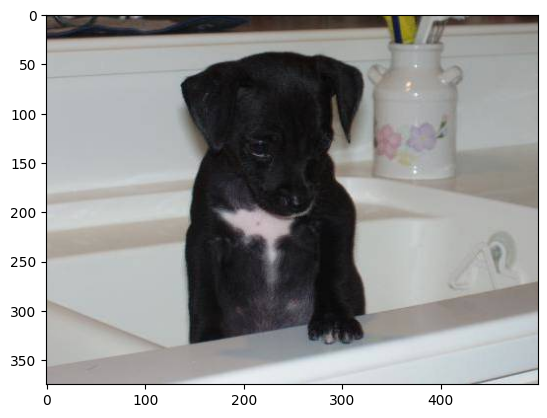

In [9]:
# Displaying the dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

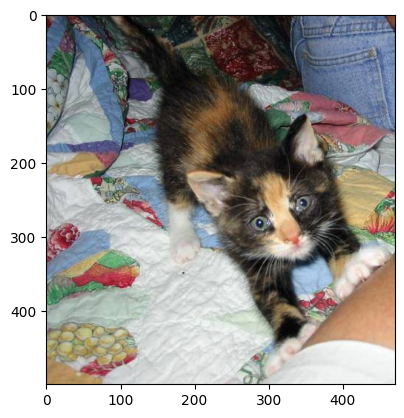

In [10]:
# Displaying the dog image
img = mpimg.imread('/content/train/cat.498.jpg')
imgplt = plt.imshow(img)
plt.show()

In [11]:
for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
dog
dog
cat
dog


In [12]:
dog_count = 0
cat_count = 0
for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images = ", dog_count)
print("Number of cat images = ", cat_count)

Number of dog images =  12500
Number of cat images =  12500


Resizing all the images

In [13]:
# Creating a directory for resized images
os.mkdir('/content/img_resized')

In [14]:
original_folder = '/content/train/'
resized_folder = '/content/img_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i] # returns ['img1.jpg', 'img2.jpg', ...]
  img_path = original_folder+filename  # returns '/content/train/img1.jpg'

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

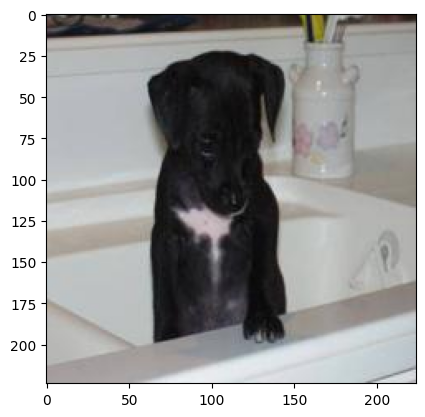

In [15]:
# Displaying the dog image
img = mpimg.imread('/content/img_resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

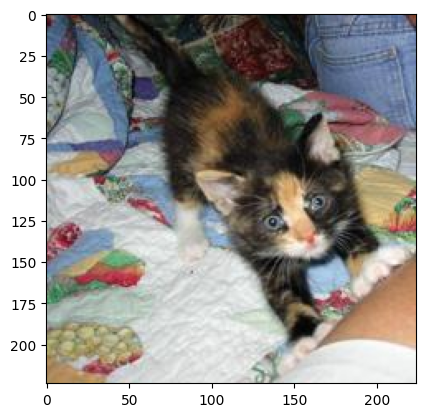

In [16]:
# Displaying the cat image
img = mpimg.imread('/content/img_resized/cat.498.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
# Creating a For loop to count the number of dogs and cats out of 2000 images
filename = os.listdir('/content/img_resized/')
print(filename)
dog_count = 0
cat_count = 0
for img_file in filename:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images = ", dog_count)
print("Number of cat images = ", cat_count)


['dog.1163.jpg', 'dog.878.jpg', 'dog.4006.jpg', 'cat.498.jpg', 'dog.964.jpg', 'dog.8529.jpg', 'cat.6345.jpg', 'dog.5328.jpg', 'dog.4963.jpg', 'dog.11549.jpg', 'dog.2041.jpg', 'cat.7468.jpg', 'dog.5626.jpg', 'dog.8514.jpg', 'cat.2860.jpg', 'cat.4655.jpg', 'dog.11268.jpg', 'cat.6335.jpg', 'cat.10252.jpg', 'cat.1630.jpg', 'dog.8747.jpg', 'dog.7009.jpg', 'cat.7889.jpg', 'dog.8944.jpg', 'cat.8475.jpg', 'dog.5908.jpg', 'dog.9218.jpg', 'cat.7643.jpg', 'cat.12039.jpg', 'cat.8011.jpg', 'cat.4164.jpg', 'cat.7925.jpg', 'cat.9641.jpg', 'dog.2922.jpg', 'cat.9325.jpg', 'cat.1868.jpg', 'cat.11541.jpg', 'cat.4779.jpg', 'dog.6609.jpg', 'cat.8325.jpg', 'cat.3646.jpg', 'dog.2809.jpg', 'dog.10114.jpg', 'dog.5445.jpg', 'dog.1250.jpg', 'dog.3683.jpg', 'cat.9138.jpg', 'cat.4000.jpg', 'cat.4216.jpg', 'cat.1859.jpg', 'dog.10167.jpg', 'dog.7767.jpg', 'dog.6494.jpg', 'dog.6581.jpg', 'cat.3081.jpg', 'cat.8832.jpg', 'dog.1145.jpg', 'dog.6104.jpg', 'cat.12334.jpg', 'cat.6741.jpg', 'cat.8836.jpg', 'dog.2983.jpg', 'c

**Creating Labels for resized images of dogs and cats**

Cat -> 0

Dog -> 1

In [18]:
# Creating a for loop to assign labels

labels = []

for i in range(2000):

  file_name = filename[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [19]:
print(filename[0:5])
print(labels[0:5])

['dog.1163.jpg', 'dog.878.jpg', 'dog.4006.jpg', 'cat.498.jpg', 'dog.964.jpg']
[1, 1, 1, 0, 1]


In [20]:
# you can also display the count of the number of dogs and cats in this way
values, counts = np.unique(labels, return_counts=True) # labels here is taken after assigining the labels to dogs and cats
print(values)
print(counts)

[0 1]
[1003  997]


Converting all the resized images to numpy arrays.

In [21]:
import cv2
import glob

In [22]:
image_directory = '/content/img_resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

print(files)

['/content/img_resized/dog.1163.jpg', '/content/img_resized/dog.878.jpg', '/content/img_resized/dog.4006.jpg', '/content/img_resized/cat.498.jpg', '/content/img_resized/dog.964.jpg', '/content/img_resized/dog.8529.jpg', '/content/img_resized/cat.6345.jpg', '/content/img_resized/dog.5328.jpg', '/content/img_resized/dog.4963.jpg', '/content/img_resized/dog.11549.jpg', '/content/img_resized/dog.2041.jpg', '/content/img_resized/cat.7468.jpg', '/content/img_resized/dog.5626.jpg', '/content/img_resized/dog.8514.jpg', '/content/img_resized/cat.2860.jpg', '/content/img_resized/cat.4655.jpg', '/content/img_resized/dog.11268.jpg', '/content/img_resized/cat.6335.jpg', '/content/img_resized/cat.10252.jpg', '/content/img_resized/cat.1630.jpg', '/content/img_resized/dog.8747.jpg', '/content/img_resized/dog.7009.jpg', '/content/img_resized/cat.7889.jpg', '/content/img_resized/dog.8944.jpg', '/content/img_resized/cat.8475.jpg', '/content/img_resized/dog.5908.jpg', '/content/img_resized/dog.9218.jpg', 

In [23]:
print(dog_cat_images)

[[[[ 78  44  31]
   [211 184 158]
   [216 202 154]
   ...
   [  2   2   2]
   [  2   2   2]
   [  2   2   2]]

  [[ 65  31  18]
   [198 172 148]
   [220 206 158]
   ...
   [  2   2   2]
   [  2   2   2]
   [  2   2   2]]

  [[ 48  16   5]
   [181 155 131]
   [228 214 166]
   ...
   [  2   2   2]
   [  2   2   2]
   [  2   2   2]]

  ...

  [[216 199 208]
   [224 207 216]
   [231 214 225]
   ...
   [ 51  37  18]
   [ 79  69  52]
   [ 82  74  57]]

  [[221 205 216]
   [228 212 223]
   [234 218 229]
   ...
   [ 55  50  35]
   [104 101  87]
   [103 101  90]]

  [[225 209 220]
   [230 214 225]
   [234 218 229]
   ...
   [ 56  56  42]
   [116 115 105]
   [110 111 101]]]


 [[[ 69  60  47]
   [ 68  59  46]
   [ 71  57  45]
   ...
   [133  93  68]
   [129  93  69]
   [127  93  69]]

  [[ 67  55  43]
   [ 67  55  43]
   [ 68  54  42]
   ...
   [132  92  67]
   [128  92  68]
   [126  92  68]]

  [[ 65  51  39]
   [ 65  51  39]
   [ 68  52  40]
   ...
   [130  90  65]
   [128  90  66]
   [127  91

In [24]:
type(dog_cat_images)

numpy.ndarray

In [25]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [26]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> training images

400 -> test images

In [29]:
# Scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
print(X_train_scaled)

[[[[0.44313725 0.54509804 0.56862745]
   [0.45882353 0.56078431 0.58431373]
   [0.43137255 0.53333333 0.55686275]
   ...
   [0.42745098 0.50588235 0.54901961]
   [0.54509804 0.63137255 0.67843137]
   [0.49803922 0.58431373 0.63137255]]

  [[0.40784314 0.50980392 0.53333333]
   [0.37254902 0.4745098  0.49803922]
   [0.43137255 0.53333333 0.55686275]
   ...
   [0.42352941 0.50980392 0.55294118]
   [0.50980392 0.60392157 0.65098039]
   [0.39215686 0.48627451 0.53333333]]

  [[0.43529412 0.5372549  0.56078431]
   [0.43921569 0.54117647 0.56470588]
   [0.48235294 0.58431373 0.60784314]
   ...
   [0.49019608 0.60392157 0.63921569]
   [0.51764706 0.63137255 0.66666667]
   [0.33333333 0.44705882 0.48235294]]

  ...

  [[0.23137255 0.4        0.41176471]
   [0.23529412 0.40392157 0.41568627]
   [0.2745098  0.43921569 0.45882353]
   ...
   [0.25882353 0.41960784 0.39215686]
   [0.22745098 0.38823529 0.35686275]
   [0.22352941 0.38823529 0.34509804]]

  [[0.18823529 0.36470588 0.38039216]
   [0.2

**Building the Nural Network**

In [31]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

In [32]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)

In [33]:
num_of_classes = 2

model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [35]:
model.fit(X_train_scaled,Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 71s 1s/step - loss: 0.2026 - acc: 0.9175
Epoch 2/5
50/50 [==============================] - 67s 1s/step - loss: 0.0686 - acc: 0.9787
Epoch 3/5
50/50 [==============================] - 66s 1s/step - loss: 0.0500 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 68s 1s/step - loss: 0.0389 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 65s 1s/step - loss: 0.0326 - acc: 0.9919


In [36]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print('Test Loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0527 - acc: 0.9775
Test Loss =  0.05272490158677101
Test Accuracy =  0.9775000214576721


**Predictive System**

In [37]:
import cv2

Path of the Image to be Predicted : /content/dogimage.jpeg


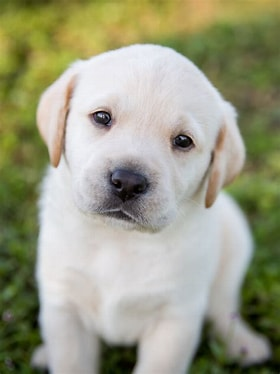

1/1 [==============================] - 0s 88ms/step
The Image represents a Dog


In [41]:
input_image_path = input('Path of the Image to be Predicted : ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize =  cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/225

input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print("The Image represents a Cat.")
else:
  print("The Image represents a Dog")